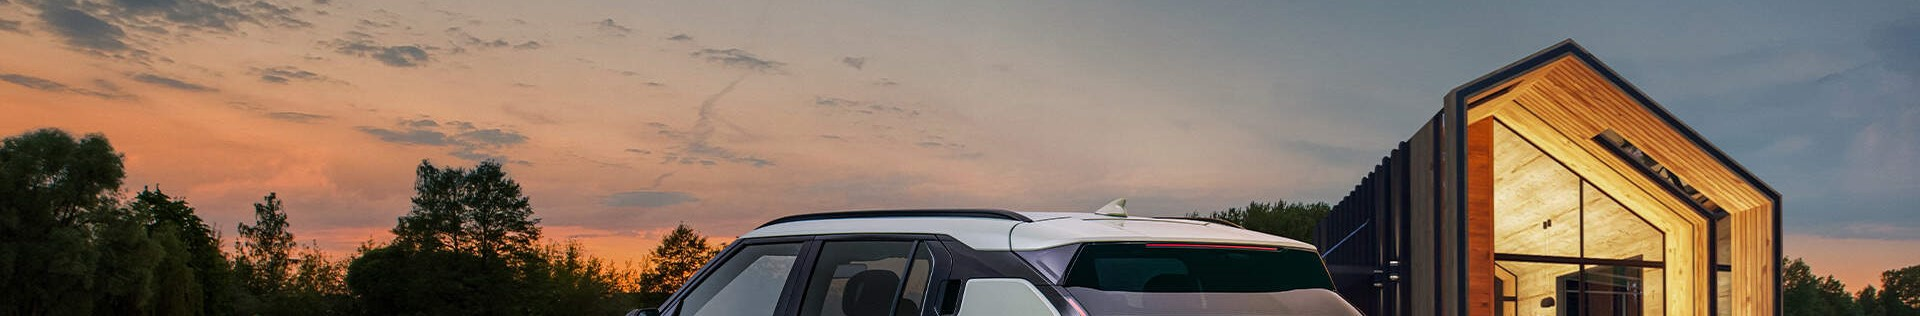

##탐색적 데이터 분석 및 통계적 분석의 이해
- Exploratory Data Analysis and Statistical Analysis Notebooks
- Author of the Original Notebook: Saba Gul
- Editing & Localizing this Notebook: Jusang Dong (naebon1@gmail.com)
- https://github.com/Saba-Gul/Exploratory-Data-Analysis-and-Statistical-Analysis-Notebooks/blob/main/Statistics_for_ML.ipynb

##이번 노트북 프로젝트 개요
- 이번 파이썬 노트북은 파이썬 및 데이터 분석을 이제 막 시작한 분들을 위한 것입니다.
- 파이썬 코드의 기본적인 작성 방식, 데이터 분석 코드의 기본적인 형태 등을 이해할 수 있어요.
- 이번 노트북 마지막엔 흥미진진한 미션도 기다리고 있어요.

In [30]:
#import
#as
#from

import pandas as pd
### numpy ## np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
### scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

###분석 대상 데이터세트: 인도 자동차 판매량 데이터
- 데이터세트 이름: CarSalesIndia.csv
- https://github.com/junsang-dong/file/blob/main/CarSalesIndia.csv
- https://www.kaggle.com/datasets/satvshr/top-4-used-car-sales-datasets-combined/data

In [31]:
#read_csv
data = pd.###("/content/CarSalesIndia.csv")

### 데이터세트의 형태 (Shape of Data)
- 테이블 형식의 정련된 데이터 (Tabular Data)
- 행: 인스턴스 (instance)
- 열: 속성 (attribute)

In [32]:
#shape
data.###

(32200, 14)

## 데이터 기본 탐색 (Explore Data)

In [33]:
#head
data.###()

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN


### 데이터세트와 타입에 대한 기본 정보
- Basic information about the dataset and data types
- info()
- describe()

In [34]:
#info
data.###()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB


### 기본적 통계량 요약 (Summary statistics)

In [35]:
#describe
data.###()

,age,engine,km,owner,price,mileage,power,seats
count,32199.000000,24068.000000,3.220000e+04,16819.000000,3.220000e+04,21380.000000,21273.000000,29353.000000
mean,7.120625,1489.872569,5.495269e+04,1.263452,7.347001e+05,19.305532,103.497647,5.233537
std,3.485577,520.916872,5.577145e+04,0.490463,7.037702e+05,4.418605,45.002260,0.707639
min,0.000000,72.000000,0.000000e+00,1.000000,4.000000e+04,0.000000,34.200000,0.000000
25%,4.000000,1197.000000,3.020825e+04,1.000000,3.850000e+05,16.500000,74.000000,5.000000
50%,7.000000,1248.000000,5.000000e+04,1.000000,5.510000e+05,19.010000,88.500000,5.000000
75%,9.000000,1591.000000,7.102075e+04,1.000000,7.920000e+05,22.320000,120.000000,5.000000
max,29.000000,5998.000000,6.500000e+06,4.000000,7.066000e+06,46.620600,600.000000,10.000000


### 누락값 확인 (Missing values)

In [36]:
#isnull
data.###().sum()

,0
brand,1
model,1
transmission,0
age,1
fuel,0
engine,8132
km,0
owner,15381
price,0
location,18399


## 중복값 확인 (Check Duplicates)

In [37]:
#duplicated
data.###().sum()

185

## 데이터 분포 확인 (Distribution)
- 데이터 중심화 경향

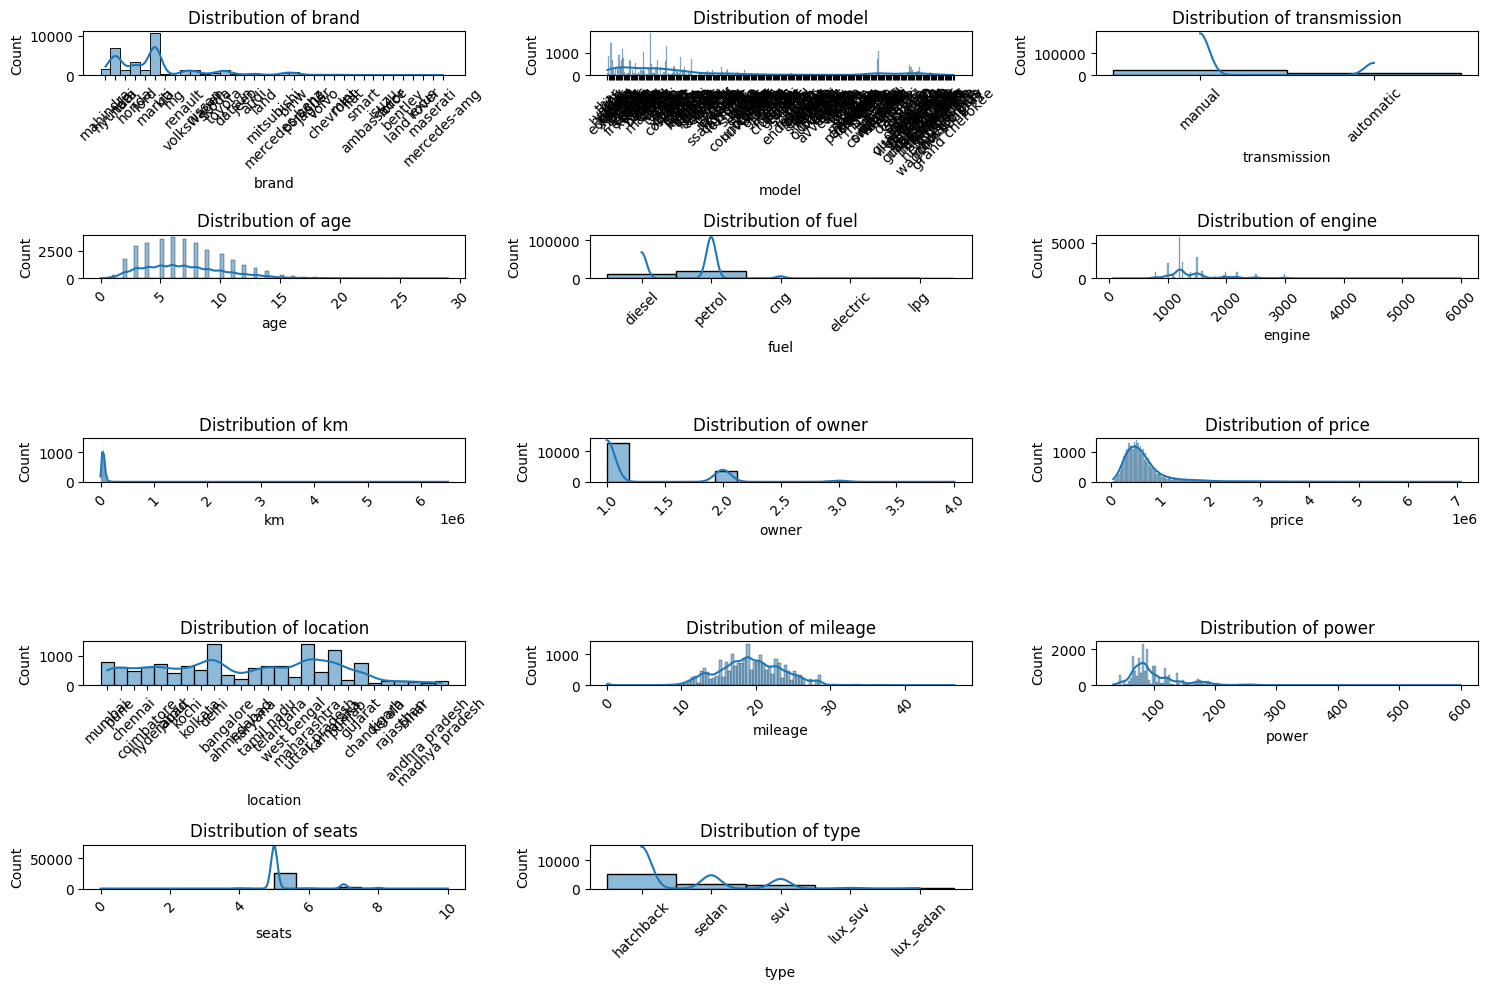

In [38]:
#figure
#histplot
#show

plt.###(figsize=(15, 10))

# Calculate the number of rows and columns for subplots
num_cols = 3  # Adjust the number of columns
num_rows = int(np.ceil(len(data.columns) / num_cols)) # Calculate rows for proper fit

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i+1)  # Use calculated rows and columns
    sns.###(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.###()

###데이터 과학 입문 미션 1: 데이터 정규화 및 표준화
- 데이터세트에 포함된 'price' 속성에 대한 정규화와 표준화 값을 생성하세요.
- 코드를 모르겠다면, Colab, Jupyter Notebook, ChatGPT의 코드 생성 기능을 사용해 보세요.

In [41]:
#min
#max
#mean
#std

# prompt: 이번 데이터 중 'price' 속성에 대한 정규화 코드 생성

# Normalize the 'price' column using Min-Max scaling
data['price_normalized'] = (data['price'] - data['price'].###()) / (data['price'].###() - data['price'].min())

# You can also use Z-score normalization if preferred
# data['price_normalized'] = (data['price'] - data['price'].###()) / data['price'].###()

# Display the first few rows to show the normalized 'price' column
print(data[['price', 'price_normalized']].head(10))


       price  price_normalized
0  1231000.0          0.169513
1   786000.0          0.106177
2  1489000.0          0.206234
3  1227000.0          0.168944
4   887000.0          0.120552


In [42]:
#zscore

# prompt: 이번 데이터 중 'price' 속성에 대한 표준화 코드 생성

# Standardize the 'price' column using Z-score normalization
data['price_standardized'] = ###(data['price'])

# Display the first few rows to show the standardized 'price' column
print(data[['price', 'price_standardized']].head(10))


       price  price_standardized
0  1231000.0            0.705213
1   786000.0            0.072894
2  1489000.0            1.071815
3  1227000.0            0.699529
4   887000.0            0.216409


###데이터 과학 입문 미션 2: 새로운 데이터 로딩 및 코드 실행
- 아래 데이터를 로딩하고, 코드를 적절히 수정해서
- 데이터의 기본적인 탐색부터 데이터 분포 시각화까지 진행해 보세요!
- 코드를 모르겠다면, Colab, Jupyter Notebook, ChatGPT의 코드 생성 기능을 사용해 보세요.
- 데이터세트: UCI Glass Identification
- https://archive.ics.uci.edu/dataset/42/glass+identification

In [ ]:
#데이터세트의 형태

In [ ]:
#데이터세트에 대한 기본정보

In [ ]:
#데이터세트에 대한 기본적 통계량

In [ ]:
#데이터세트에 존재하는 누락값 확인

In [ ]:
#데이터세트에 존재하는 중복값 확인

In [ ]:
#이번 데이터세트의 데이터 분포 시각화